# 회귀 분석
## 패키지 Import

In [1]:
import os
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import numpy as np
import math
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import os
if os.name == 'nt' :
    font_family = "Malgun Gothic"
else:
    font_family = "AppleGothic"
    
sns.set(font=font_family, rc ={"axes.unicode_minus" : False})

## 1. 데이터 셋
### sklern-load_diabetes
 - 당뇨병 진행도 예측용 데이터는 442명의 당뇨병 환자를 대상으로 한 검사 결과를 나타내는 데이터
 - 10 종류의 독립변수, 독립변수의 값들은 모두 스키일링(scaling)

### 종속변수
 - target : 1년 뒤 측정한 당뇨병의 진행률
        
### 독립변수
 - age : 나이
 - sex : 성별
 - bmi : BMI 지수
 - bp : 평균 혈압
 - s1 ~ s6 6종류의 혈액 검사 수치

In [2]:
# 데이터셋 로드
from sklearn.datasets import load_diabetes

data = load_diabetes()
df = pd.DataFrame(data.data, columns=data.feature_names)
df["target"] = data.target
# df.head()

# 상관관계 확인
df.corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
age,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731,0.187889
sex,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,-0.379090,0.332115,0.149916,0.208133,0.043062
bmi,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680,0.586450
bp,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430,0.441482
s1,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717,0.212022
s2,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600,0.174054
s3,-0.075181,-0.379090,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
s4,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212,0.430453
s5,0.270774,0.149916,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669,0.565883
s6,0.301731,0.208133,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000,0.382483


## 2. 단순선형회귀분석
### 1) 데이터 탐색

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


<AxesSubplot:xlabel='bmi', ylabel='target'>

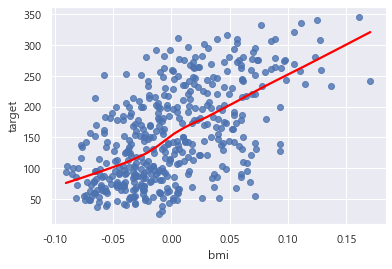

In [4]:
# 산점도 확인
sns.regplot('bmi', 'target', lowess=True, line_kws={'color' : 'red'}, data=df)

Text(0.5, 1.0, 'rate')

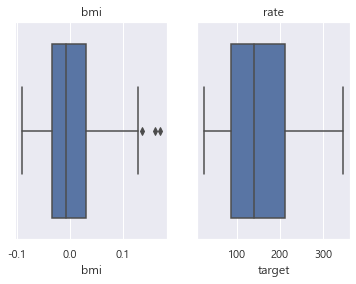

In [6]:
# 이상값 확인
fig, (ax1, ax2) = plt.subplots(1, 2)

sns.boxplot('bmi', data=df, ax=ax1)
ax1.set_title('bmi')

# dist의 상자그림을 두 번째(ax2)로 그린다.
sns.boxplot('target', data=df, ax=ax2)
ax2.set_title('rate')

Text(0.5, 1.0, 'rate')

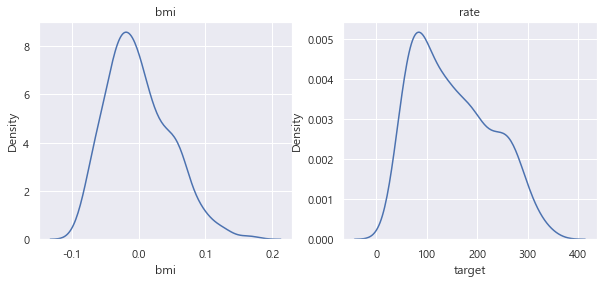

In [7]:
# 분포 시각화
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

sns.kdeplot('bmi', data=df, ax=ax1)
ax1.set_title('bmi')

# dist의 상자그림을 두 번째(ax2)로 그린다.
sns.kdeplot('target', data=df, ax=ax2)
ax2.set_title('rate')

In [8]:
# 비대칭 확인(왜도)
import scipy.stats
print(scipy.stats.skew(df['bmi']))
print(scipy.stats.skew(df['target']))

0.5961166556214368
0.43906639932477265


### 2) 단순선형회귀-sklearn

#### from sklearn.linear_model import LinearRegression

In [10]:
# 데이터셋 생성
x = df.bmi.values
y = df.target.values

l_train_x1 = x.reshape(-1, 1)
l_test_y1 = y.reshape(-1, 1)

print(x.shape)
print(l_train_x1.shape)

(442,)
(442, 1)


In [11]:
# 모델 학습
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(l_train_x1, l_test_y1)

LinearRegression()

In [12]:
# 회귀계수 확인
print(lr_model.coef_[0])
print(lr_model.intercept_)

[949.43526038]
[152.13348416]


In [13]:
# 선형회귀 모델로 값 예측
lr_model.predict([[2], [-1], [0], [1], [2]])

array([[2051.00400493],
       [-797.30177622],
       [ 152.13348416],
       [1101.56874455],
       [2051.00400493]])

In [14]:
# 잔차 계산
lr_prediction = lr_model.predict(l_train_x1)
lr_residuals = l_test_y1 - lr_prediction

In [16]:
# R_squared 계산
SSE = (lr_residuals**2).sum()
SST = ((l_test_y1 - l_test_y1.mean())**2).sum()
R_squared = 1 - (SSE / SST)
print('R_squared :', R_squared)

R_squared : 0.3439237602253802


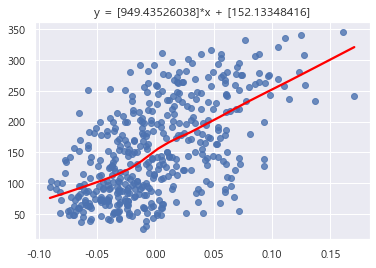

In [17]:
# 단순회귀 모델 시각화
sns.regplot(l_train_x1, l_test_y1, lowess=True, line_kws={'color' : 'red'}, data = df)
plt.title('y = {}*x + {}'.format(lr_model.coef_[0], lr_model.intercept_))
plt.show()

### 3) 단순선형회귀 통계적 분석

#### from statsmodels.formula.api import ols

In [18]:
from statsmodels.formula.api import ols

res_sr = ols('target ~ bmi', data=df).fit() # 종속변수 : traget, 독립변수 : bmi

In [19]:
# 결과 확인
res_sr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.344
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                     230.7
Date:                Wed, 20 Jul 2022   Prob (F-statistic):           3.47e-42
Time:                        10:43:41   Log-Likelihood:                -2454.0
No. Observations:                 442   AIC:                             4912.
Df Residuals:                     440   BIC:                             4920.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    152.1335      2.974     51.162      0.000     146.289     157.978
bmi          949.4353     62.515     15.187      0.000     826.570    1072.301
==============================================================================
Omnibus:                       11.674   Durbin-Watson:                   1.848
Prob(Omnibus):                  0.003   Jarque-Bera (JB):                7.310
Skew:                           0.156   Prob(JB):                       0.0259
Kurtosis:                       2.453   Cond. No.                         21.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 4) 회귀분석 결과
#### 첫 번째 표
 - DF.Model(독립변수 개수) : 1
 - No.Observations(표본 수) : 442
 - DF Residuals(잔차의 자유도 : 표본 수 - 종속변수 개수 - 독립변수 개수) : 440
 - R-Squared(결정계수) : 0.344(1에 가까울 수록 좋음)
 - Adj.R-Squared(조정된 결정계수) : 0.342
 - F-statistic : 230.7(0에 가까울수록 적절)
 - Preb(F-statistic) : 3.47e-42(0.5 이하일수록 회귀계수는 0이 아니다) <= 유의미함
 
#### 두번째표
 - Coef(데이터로부터 얻은 회귀계수의 추정치) : target=bmi X 949.4353+152.1335
 - std err(계수 추정치의 표준오차, 작을 수록 좋음0
 - t(t-test, 독립변수와 종속변수 사이의 상관관계)
 - P > |t| (독립변수들의 유의 확률 : 현재와 같은 크기의 표본에서 이러한 계수가 추정될 확률인 p값, 0.05보다 작을수록 좋음) P > |t| < 0.05 <= 유의미함

#### 결과 요약

#### 모델 적합도
 - target 대하여 bmi로 예측하는 회귀분석을 실시한 결과, 이 회귀 모델은 통계적으로 유믜미하였다
 (F(1, 440) = 230.7, p < 0.05)
#### 독립변수
 - bmi의 회귀계수는 949.4353로, target에 대하여 유의미한 예측 변인인 것으로 나타났다.
    (t(440) = 15.187, p < 0.05)

## 2. 다중선형회귀 모델
### 1) 데이터 탐색

In [20]:
print(df.shape)
df.head(3)

(442, 11)


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0


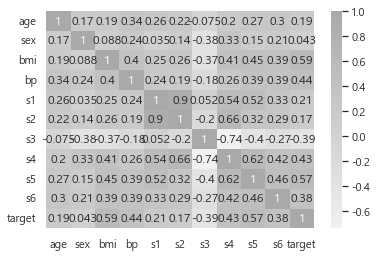

In [21]:
cmap = sns.light_palette("darkgray", as_cmap=True)
sns.heatmap(df.corr(), annot=True, cmap=cmap)
plt.show()

### 2) 다중선형회귀분석 - sklearn

#### from sklearn.linear_model import LinearRegression

In [22]:
# 데이터셋 준비
dlr_train_x_df = df.copy()
dlr_train_x_df = dlr_train_x_df.drop('target', 1)

dlr_test_y = df.target.values
dlr_test_y = dlr_test_y.reshape(-1, 1)

In [24]:
# LinearRegression
dlr_model = LinearRegression()

dlr_model.fit(X = dlr_train_x_df, y = dlr_test_y)
# linear_regression.fit(x = pd.DataFrame(x), y=y)

print('절편 :', dlr_model.intercept_)
print('회귀분석 :', dlr_model.coef_)

절편 : [152.13348416]
회귀분석 : [[ -10.0098663  -239.81564367  519.84592005  324.3846455  -792.17563855
   476.73902101  101.04326794  177.06323767  751.27369956   67.62669218]]


In [25]:
# 잔차
prediction = dlr_model.predict(dlr_train_x_df)
residuals = dlr_test_y - prediction

# residuals.describe()

In [27]:
# R_suared 계산

SSE = (residuals**2).sum()
SST = ((dlr_test_y - dlr_test_y.mean())**2).sum()
R_squared = 1 - (SSE / SST)
print('R_squared :', R_squared)

R_squared : 0.5177484222203499


In [28]:
# 모델 평가 MSE & RMSE

from sklearn.metrics import mean_squared_error
from math import sqrt

mse = mean_squared_error(dlr_test_y, prediction)
print(mse)
rmse = sqrt(mse)
print(rmse)

print('score =', dlr_model.score(X=dlr_train_x_df, y=dlr_test_y))
print('mean_squared_error =', mse)
print('RMSE =', rmse)

2859.6963475867497
53.47612876402657
score = 0.5177484222203499
mean_squared_error = 2859.6963475867497
RMSE = 53.47612876402657


### 3) 다중선형회귀분석-통계적 데이터 분석

In [29]:
print(df.shape)
df.head(3)

(442, 11)


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0


In [31]:
from statsmodels.formula.api import ols
s_d_model = ols('target ~ age + sex + bmi + bp + s1 + s2 + s3 + s4 + s5 + s6', df)

In [32]:
m_result = s_d_model.fit()

In [33]:
m_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     46.27
Date:                Wed, 20 Jul 2022   Prob (F-statistic):           3.83e-62
Time:                        11:06:16   Log-Likelihood:                -2386.0
No. Observations:                 442   AIC:                             4794.
Df Residuals:                     431   BIC:                             4839.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    152.1335      2.576     59.061      0.000     147.071     157.196
age          -10.0099     59.749     -0.168      0.867    -127.446     107.426
sex         -239.8156     61.222     -3.917      0.000    -360.147    -119.484
bmi          519.8459     66.533      7.813      0.000     389.076     650.616
bp           324.3846     65.422      4.958      0.000     195.799     452.970
s1          -792.1756    416.680     -1.901      0.058   -1611.153      26.802
s2           476.7390    339.030      1.406      0.160    -189.620    1143.098
s3           101.0433    212.531      0.475      0.635    -316.684     518.770
s4           177.0632    161.476      1.097      0.273    -140.315     494.441
s5           751.2737    171.900      4.370      0.000     413.407    1089.140
s6            67.6267     65.984      1.025      0.306     -62.064     197.318
==============================================================================
Omnibus:                        1.506   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.471   Jarque-Bera (JB):                1.404
Skew:                           0.017   Prob(JB):                        0.496
Kurtosis:                       2.726   Cond. No.                         227.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 4) 다중공선성 확인

In [34]:
# VIF(분산팽창요인) 계산 - 10이 넘어가는 값 => 다중공선성 판단
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 회귀분석 모델 변수
print(s_d_model.exog_names)

# bmi의 VIF
print(variance_inflation_factor(s_d_model.exog, 1))

# 독립변수 VIF
pd.DataFrame({'컬럼' : column, 'VIF' : variance_inflation_factor(s_d_model.exog, i)}
            for i, column in enumerate(s_d_model.exog_names)
            if column != 'Intercept'
            ) # 절편 제외

['Intercept', 'age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
1.2173065138070078


,컬럼,VIF
0,age,1.217307
1,sex,1.278071
2,bmi,1.509437
3,bp,1.459428
4,s1,59.202510
5,s2,39.193370
6,s3,15.402156
7,s4,8.890986
8,s5,10.075967
9,s6,1.484623


#### 계수가 통계적으로 유의미하지 않다면 대처
 - 계수가 통계적으로 유의미하다면 VIF가 크더라도 특별히 대처할 필요 없음
    
#### 변수들을 더하거나 빼서 새로운 변수를 만든다
 - (개념적으로나 이론적으로) 두 예측변수를 더하거나 빼더라도 문제가 없는 경우
 - 예) 남편의 수입과 아내의 수입이 서로 상관이 높다면, 두 개를 더해 가족 수입이라는 하나의 변수로 투입한다.
 - 더하거나 빼기 어려운 경우는 변수를 모델에서 제거한다 -- 단, 변수를 제거하는 것은 자료의 다양성을 해치고, 분석하려던 가설이나 이론에 영향을 미칠 수 있기 때문에 가급적 자제

### 5) 잔차 분석

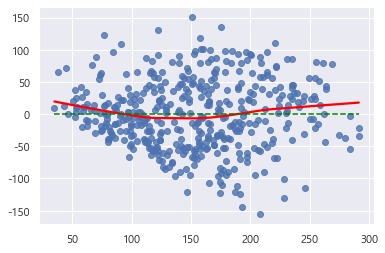

In [35]:
# 선형성
s_d_res_fit = m_result.predict(df)
s_d_residuals = df['target'] - s_d_res_fit

# 선형성 시각화(red : 잔차)
sns.regplot(s_d_res_fit, s_d_residuals, lowess=True, line_kws={'color' : 'red'})
plt.plot([s_d_res_fit.min(), s_d_res_fit.max()], [0,0], '--', color='green')

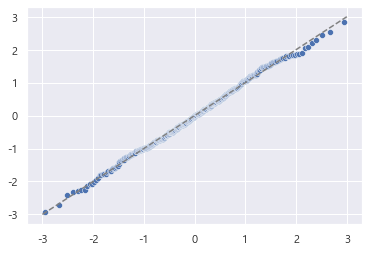

In [37]:
# 정규성 확인 (QQplot, 점 값이 선율 따라 배치되는 것이 이상적)
s_d_sr = stats.zscore(s_d_residuals)
(s_d_x, s_d_y), _ = stats.probplot(s_d_sr)

# 정규성 시각화
sns.scatterplot(s_d_x, s_d_y)
plt.plot([-3, 3], [-3, 3], "--", color='grey')

<AxesSubplot:>

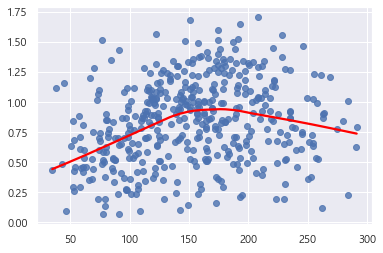

In [38]:
# 잔차의 등분산성(수평선이 이상정)
sns.regplot(s_d_res_fit, np.sqrt(np.abs(s_d_sr)), lowess=True, line_kws={'color' : 'red'})


In [40]:
# 극단값 확인
from statsmodels.stats.outliers_influence import OLSInfluence
cd, _ = OLSInfluence(m_result).cooks_distance # Coook's Distance
cd.sort_values(ascending=False).head()

382    0.024475
123    0.021348
169    0.019559
304    0.018944
92     0.018133
dtype: float64